# 머신러닝, 시계열 모델 이론 및 실습 기초 / 머신러닝 고급 평가
* 일시 - 25. 04. 10 (목) 오후 2시 - 5시 (3시간 예정)
* 문제 형식 - 머신러닝 실기 문제 5개
* 시험 형식 - 오픈북, LMS 제출
* 주의사항 - 인터넷 검색 금지, 챗GPT 사용 금지 (적발시 0점 처리)

## 문제 1
breast_cancer.csv 데이터는 위스콘신 유방암 진단 데이터셋입니다.

목표 변수 (Target): 유방암 종양이 악성(malignant)인지 양성(benign)인지를 나타냅니다.

### 특성 (Features)
유방 종괴(mass)의 미세침흡인(Fine Needle Aspirate, FNA) 검사 결과 이미지로부터 계산된 30개의 수치형(numeric) 특성으로 구성됩니다. 이 특성들은 이미지에 나타난 세포 핵(cell nuclei)의 다음과 같은 특징들을 포함합니다.

* 반경 (radius)
* 질감 (texture)
* 둘레 (perimeter)
* 면적 (area)
* 매끄러움 (smoothness)
* 조밀성 (compactness)
* 오목함 (concavity)
* 오목한 점의 수 (concave points)
* 대칭성 (symmetry)
* 프랙탈 차원 (fractal dimension) (각 특징에 대해 평균(mean), 표준 오차(standard error), 최악(worst)/최대(largest) 값이 포함되어 총 30개가 됩니다.)
* 데이터 크기: 총 569개의 샘플(종양 진단 결과) 데이터로 구성되어 있습니다. (악성 212개, 양성 357개)

결정트리 모델을 통해서 이 데이터를 학습시키고, 학습하는데 있어서 사용된 특성별 중요도를 시각화하고, 가장 큰 영향을 미친 특성 이름을 출력하세요.

1. 올바른 방법으로 결정트리 모델을 만들고 데이터를 학습시켰다. (5점)
2. 특성 중요도를 이해하기 쉽게 시각화 하였다. (5점)
3. 가장 큰 영향을 미친 특성 이름을 출력하였다. (10점)

In [2]:
import pandas as pd
df = pd.read_csv("Data/breast_cancer.csv")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [3]:
X = df.drop("target", axis = 1)
Y = df["target"]

In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(train_x, train_y)

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

1.0
0.951048951048951


In [9]:
from sklearn.metrics import classification_report
pred = model.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

      benign       0.97      0.95      0.96        87
   malignant       0.93      0.95      0.94        56

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



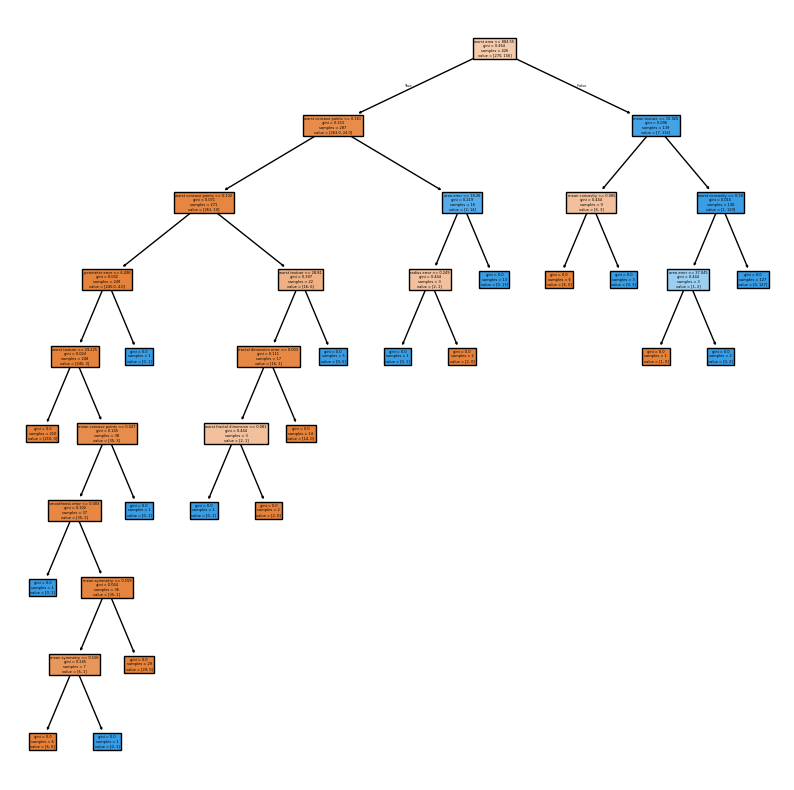

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plot_tree(model, filled=True, feature_names=df.columns[:-1])
plt.show()

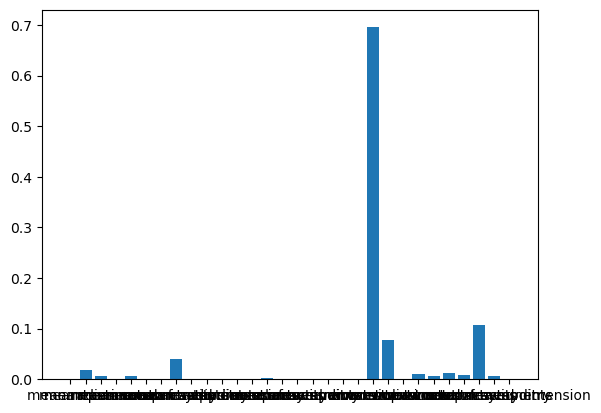

In [21]:
model = DecisionTreeClassifier()
model.fit(X, Y)

A = model.feature_importances_

plt.bar(df.columns[:-1], A)
plt.show()

In [22]:
A

array([0.        , 0.01772124, 0.00563858, 0.        , 0.00701689,
       0.        , 0.        , 0.04061249, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00204521, 0.00100384,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.69559352, 0.07728413, 0.        , 0.0110859 , 0.00738798,
       0.01146992, 0.00872741, 0.10709688, 0.007316  , 0.        ])

In [28]:
df.columns[20]

# 가장 큰 영향을 미친 특성 : 'worst radius'

'worst radius'

In [ ]:
np.argmax(model.feature_importances_)   # 이거쓰면 가장큰값을 갖는 위치알려줌

## 문제 2
bike.csv 데이터는 공공자전거 상황별 공공자전거 수요(대여 건수)에 대한 데이터입니다.
수요(대여 건수)를 예측하는 머신러닝 모델을 개발하세요.

* datetime: 자전거가 대여된 날짜와 시간
* season: 대여가 이루어진 계절, 각각 봄 0, 여름 1, 가을 2, 겨울 3을 의미.
* holiday: 해당 날짜가 공휴일인지 여부를 나타내는 이진 변수, 공휴일이면 1, 아니면 0
* workingday: 해당 날짜가 근무일인지 여부, 평일은 1, 주말이나 휴일은 0으로 표시
* weather: 대여 당시의 날씨 상태, 보통 1: 맑음, 2: 약간 흐림, 3: 비, 4: 극심한 날씨
* temp: 실제 기온(섭씨 단위)
* atemp: 체감 온도
* humidity: 대기 중 상대 습도를 백분율(%)
* windspeed: 대여 당시의 풍속
* casual: 등록되지 않은(임시) 사용자의 대여 건수
* registered: 정식 회원이나 등록 사용자의 대여 건수
* count: 전체 대여 건수

### 요구사항
* 전체 데이터를 대상으로 5겹(Randomly) 교차검증을 수행합니다.
* 교차검증 시 평균 R-Squared 값이 0.9 이상이 나오도록 모델을 설계합니다. (항상 실행할때마다 R-Squared 값이 0.9 이상 나와야합니다. 아니면 오답입니다.)
* 회귀 모델 선택은 자유롭게 이용 가능합니다.

공공자전거 count(전체 대여 건수)에 대해 회귀 예측하는 모델을 설계하세요. (전체 데이터에 대한 교차 검증 결과가 반드시 출력 되어있어야 합니다.)

1. 데이터를 올바르게 전처리 및 가공하였다. (5점)
2. 교차검증을 올바른 방법으로 진행하였다. (5점)
3. 교차검증의 R-Squared 평균 결과값이 0.9 이상이다. (10점)

In [109]:
import pandas as pd
bike = pd.read_csv("Data/bike.csv")
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike = bike.set_index("datetime")
bike

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168


In [110]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 850.5 KB


In [111]:
X = bike.drop("count", axis = 1).values
Y = bike['count'].values

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)

KNeighborsClassifier()

In [120]:
# k겹 교차검증
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True)

model = KNeighborsClassifier()
scores = cross_val_score(model, train_scaled, train_y, cv = kfold) 
scores.mean()        

# 평균 R-Squared : 0.013

0.013351239148445663

In [126]:
from sklearn.neighbors import KNeighborsRegressor 
model = KNeighborsRegressor(n_neighbors=5)
model.fit(train_scaled, train_y)

KNeighborsRegressor()

In [127]:
print(model.score(train_scaled, train_y)) 
print(model.score(test_scaled, test_y))

0.531856683191636
0.271648019607743


## 문제 3
cluster.csv 데이터를 적절하게 군집화 해보세요. 최적의 군집 개수는 몇 개 인가요?
1. 최적의 군집을 찾아내기 위한 시각화를 올바르게 진행하였다. (5점)
2. 최적의 군집 개수를 찾아내고, 최적의 군집 개수를 출력하였다. (15점)

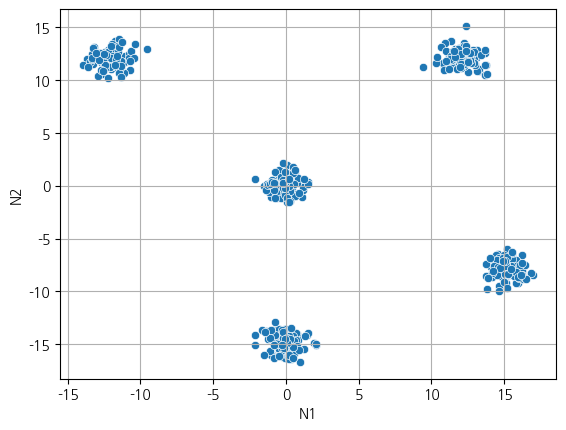

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Data/cluster.csv")
sns.scatterplot(data=df, x="N1", y="N2")
plt.grid()
plt.show()

In [152]:
X = df.values
X

array([[-4.18178416e-01, -1.41607926e+01],
       [-5.81709741e-01, -1.51980149e+01],
       [-1.25172583e+01,  1.11347616e+01],
       [-4.81365290e-01,  1.48182255e+00],
       [-1.26883307e+01,  1.16923556e+01],
       [ 1.36692351e-01, -1.51471867e+01],
       [ 1.45558404e+01, -6.49507434e+00],
       [ 1.41830137e+01, -7.43331484e+00],
       [-1.06971076e+01,  1.08959188e+01],
       [-1.26106073e+01,  1.05560943e+01],
       [ 3.94654321e-01, -1.48521311e+01],
       [-6.71374019e-01, -2.47369901e-01],
       [-4.31807744e-01, -1.56226438e+01],
       [ 1.45859110e+01, -7.82096964e+00],
       [-1.53888772e-01,  2.41237874e-01],
       [ 6.32825558e-01, -7.27509964e-01],
       [-1.07977798e-02, -8.46168743e-01],
       [-1.24244009e+01,  1.15393454e+01],
       [-1.17067214e+01,  1.12480962e+01],
       [ 1.55455132e+01, -6.52263414e+00],
       [ 1.27800958e+01,  1.18823541e+01],
       [ 2.65010745e-01,  7.80436102e-01],
       [ 1.12147931e+01,  1.23696828e+01],
       [ 1.

For n_clusters = 3, the average silhouette_score is : 0.6478
For n_clusters = 4, the average silhouette_score is : 0.7589
For n_clusters = 5, the average silhouette_score is : 0.9133
For n_clusters = 6, the average silhouette_score is : 0.7930
For n_clusters = 7, the average silhouette_score is : 0.7986


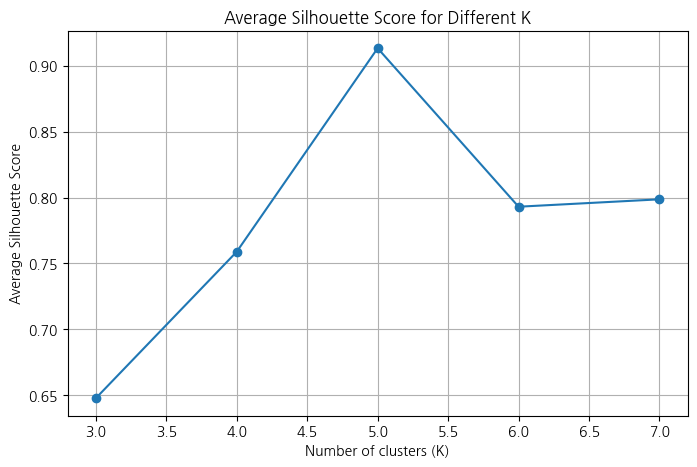

In [153]:
import koreanize_matplotlib
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 다양한 K 값에 대해 실루엣 분석 수행
range_n_clusters = [3, 4, 5, 6, 7]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X) # 각 데이터 포인트에 클러스터 레이블 할당

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Average Silhouette Score for Different K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

In [169]:
A = silhouette_avg_scores, range_n_clusters

for i in range(len(A[0])):
    if A[0][i] == sorted(silhouette_avg_scores)[-1]:
        print(range_n_clusters[i])

# 최적의 군집 개수 K = 5.

5


## 문제 4
삼성전자 데이터를 활용하여 다음날 종가(Close)를 예측하는 회귀 모델을 구축해 보세요. 모델 학습에는 Open, High, Low, Close, Volume, Change 열을 입력 변수로 사용해야 합니다. 그리고 학습을 모두 마치면 2025년 4월 8일 종가(Close)값을 예측해보세요. (시계열 데이터 분석이 아닌, 우리가 머신러닝 과정에서 배운 회귀 모델을 사용하세요.)

1. 데이터 전처리, 모델 생성, 학습이 올바른 과정으로 진행되었다. (10점)
2. 2025년 4월 8일 Close값을 예측하고 값을 출력하였다. (10점)

In [1]:
import pandas as pd
df = pd.read_csv("Data/samsung.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.dropna()
df = df.set_index("Date")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-12-12,3579,3650,3499,3500,1474958,-0.022346
2000-12-13,3500,3779,3500,3780,1682889,0.080000
2000-12-14,3619,3680,3560,3620,1339386,-0.042328
2000-12-15,3620,3640,3480,3490,1059217,-0.035912
2000-12-18,3500,3590,3489,3560,687058,0.020057
...,...,...,...,...,...,...
2025-04-01,58700,59600,57900,58800,13841706,0.017301
2025-04-02,58800,59400,58300,58800,14402297,0.000000
2025-04-03,56900,57800,56900,57600,19508076,-0.020408


In [2]:
df["Pred"] = df["Close"].shift(-1) 
len(df)

5999

In [3]:
df

,Open,High,Low,Close,Volume,Change,Pred
Date,,,,,,,
2000-12-12,3579,3650,3499,3500,1474958,-0.022346,3780.0
2000-12-13,3500,3779,3500,3780,1682889,0.080000,3620.0
2000-12-14,3619,3680,3560,3620,1339386,-0.042328,3490.0
2000-12-15,3620,3640,3480,3490,1059217,-0.035912,3560.0
2000-12-18,3500,3590,3489,3560,687058,0.020057,3530.0
...,...,...,...,...,...,...,...
2025-04-01,58700,59600,57900,58800,13841706,0.017301,58800.0
2025-04-02,58800,59400,58300,58800,14402297,0.000000,57600.0
2025-04-03,56900,57800,56900,57600,19508076,-0.020408,56100.0


In [4]:
X = df[:5998].drop("Pred", axis = 1).values
Y = df[:5998]["Pred"].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_scaled, train_y)

print(model.score(train_scaled, train_y))
print(model.score(test_scaled, test_y))

0.9992407061477171
0.9993001325301194


In [6]:
a = model.predict(test_scaled)   # 예측값

In [7]:
train_y

array([ 6390., 11480., 43900., ..., 14900., 23480.,  8100.])

## 문제 5
이 데이터는 MNIST 이미지 데이터 셋입니다. 이 데이터셋은 손으로 쓴 숫자 이미지로 구성된 대규모 데이터베이스입니다. 머신러닝, 특히 이미지 분류(Image Classification) 분야에서 성능을 테스트하고 비교하기 위한 표준 벤치마크 데이터셋으로 널리 사용됩니다. 분류 모델을 설계하여 MNIST 데이터를 학습하는 모델을 설계하세요.

1. train set과 test set을 적절하게 전처리 및 가공하였다. (5점)
2. 분류 모델을 설계하고, train_set을 학습시켰다. (5점)
3. 학습이 완료된 모델로 test set의 정확도, 정밀도, 재현율 성능을 확인하였다. (5점)
4. 변수 A의 값이 어떤 숫자인지 분류 모델을 활용하여 정확하게 예측하였다. (5점)

In [272]:
import pickle

f = open("Data/image_data.dat", 'rb')
train_x, train_y, test_x, test_y = pickle.load(f)
f.close()

In [273]:
len(train_x), len(test_x)

(60000, 10000)

<function matplotlib.pyplot.show(close=None, block=None)>

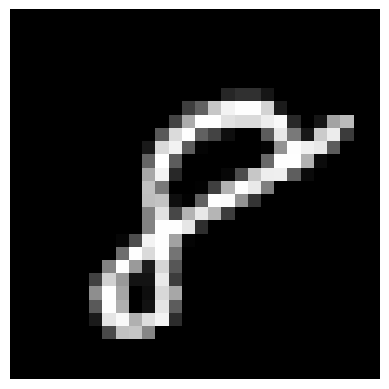

In [307]:
plt.imshow(train_x[59999], cmap = "gray")
plt.axis("off")
plt.show

In [308]:
train_x2 = train_x.reshape(60000, 784)
train_x2.shape

(60000, 784)

In [309]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
km = KMeans(n_clusters=9)

km.fit(train_x2)

KMeans(n_clusters=9)

In [310]:
km.labels_     # 6만개

array([4, 6, 7, ..., 4, 2, 0])

In [332]:
print(km.score(train_x2, train_y))

-155335737512.09436


In [327]:
test_x2 = test_x.reshape(10000, 784)
test_x2.shape

(10000, 784)

In [329]:
print(km.score(test_x2, test_y))

-25853604348.884262


In [334]:
from sklearn.metrics import classification_report
score = km.score(test_x2, test_y)
pred = km.predict(test_x2)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       980
           1       0.00      0.00      0.00      1135
           2       0.03      0.02      0.02      1032
           3       0.08      0.08      0.08      1010
           4       0.00      0.00      0.00       982
           5       0.01      0.01      0.01       892
           6       0.02      0.02      0.02       958
           7       0.19      0.29      0.23      1028
           8       0.18      0.26      0.21       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.07     10000
   macro avg       0.05      0.07      0.06     10000
weighted avg       0.05      0.07      0.06     10000



In [338]:
import numpy as np

A = np.array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 255,
       105,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
       188, 253, 216,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  14, 202, 253, 253,  23,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  12, 199, 253, 128,   6,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  42, 253, 253, 158,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  42, 253, 253, 158,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 253, 253, 158,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160, 253,
       253, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       160, 253, 253,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  17, 225, 253, 235,  31,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  24, 253, 253, 176,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  24, 253, 253, 176,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  24, 253, 253, 176,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 253, 253, 176,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 253,
       253, 162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        46, 253, 253,  59,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 142, 253, 253,  59,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 142, 253, 253,  59,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 142, 253, 202,   8,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  87, 253, 139,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0])

In [348]:
A.shape

(784,)

TypeError: Invalid shape (784,) for image data

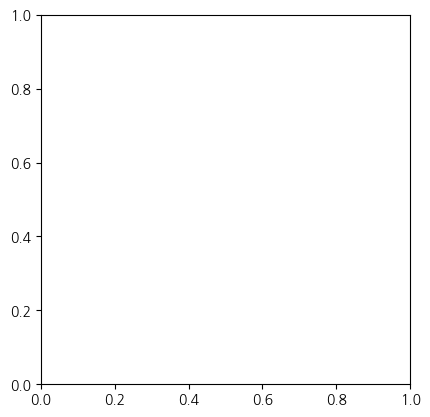

In [349]:
plt.imshow(A, cmap = "gray")
plt.axis("off")
plt.show